In [123]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from neural_damped_oscillator import ODE_NN
import time

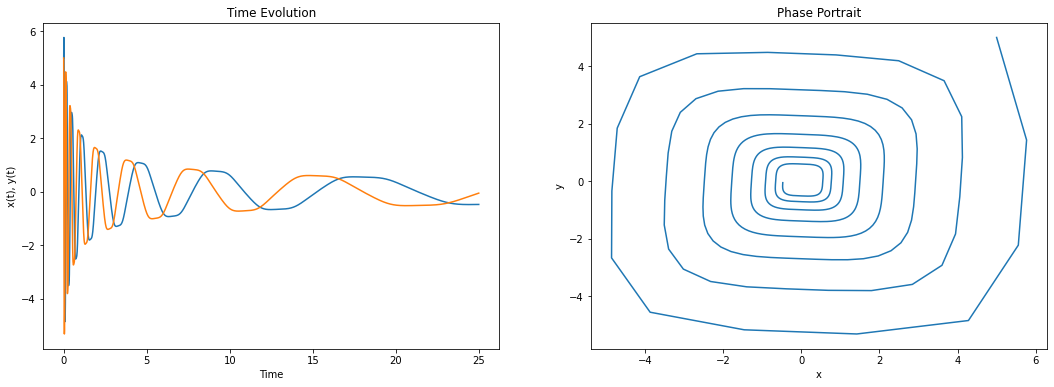

In [117]:
# set up the differential equation and get a reference solution (which is also the training data)

x0y0 = [5,5]
t = np.arange(0, 25, 0.01)
noise_factor = 0.0

def f(y, t):
    return [-0.1*y[0]**3 + 2.0*y[1]**3, -2.0*y[0]**3 - 0.1*y[1]**3]

system = odeint(f, x0y0, t)
training_data = system + noise_factor * system.std(0) * np.random.randn(system.shape[0], system.shape[1])

# plot the trajectories and the phase portraits

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t), y(t)')
axs[0].set_title('Time Evolution')
axs[1].plot(system[:,0], system[:,1])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Phase Portrait')
plt.show()

In [118]:
# Initialize the model and check the architecture

model = ODE_NN(0.01, training_data, 2, 'AM', num_neurons=128)

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Tanh()
  (2): Linear(in_features=128, out_features=2, bias=True)
)


Epoch : 0, Loss : 217.8369140625
Epoch : 200, Loss : 177.1571807861328
Epoch : 400, Loss : 159.3818359375
Epoch : 600, Loss : 143.56082153320312
Epoch : 800, Loss : 125.4752197265625
Epoch : 1000, Loss : 107.01570129394531
Epoch : 1200, Loss : 90.4883041381836
Epoch : 1400, Loss : 76.57853698730469
Epoch : 1600, Loss : 65.20420837402344
Epoch : 1800, Loss : 55.902503967285156
Epoch : 2000, Loss : 48.22956085205078
Epoch : 2200, Loss : 41.88224792480469
Epoch : 2400, Loss : 36.569313049316406
Epoch : 2600, Loss : 32.06256866455078
Epoch : 2800, Loss : 28.21734619140625
Epoch : 3000, Loss : 24.91562271118164
Epoch : 3200, Loss : 22.043441772460938
Epoch : 3400, Loss : 19.536605834960938
Epoch : 3600, Loss : 17.25604820251465
Epoch : 3800, Loss : 15.261412620544434
Epoch : 4000, Loss : 13.5167236328125
Epoch : 4200, Loss : 11.91787052154541
Epoch : 4400, Loss : 10.51393985748291
Epoch : 4600, Loss : 9.237505912780762
Epoch : 4800, Loss : 8.120624542236328
Epoch : 5000, Loss : 7.1196703910

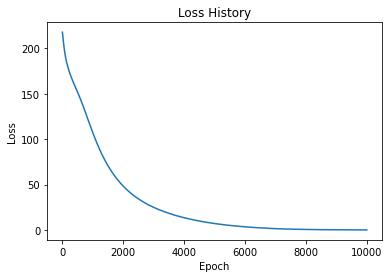

In [119]:
# Train the NN model using the data from the ODE solver and use it as the surrogate for the ODE

num_epochs = 10000
model.train(num_epochs)

def f_NN(y, t):
    f_net = model.model.to('cpu')
    f = f_net(torch.Tensor(y)).detach().numpy()
    return f

system_NN = odeint(f_NN, x0y0, t)

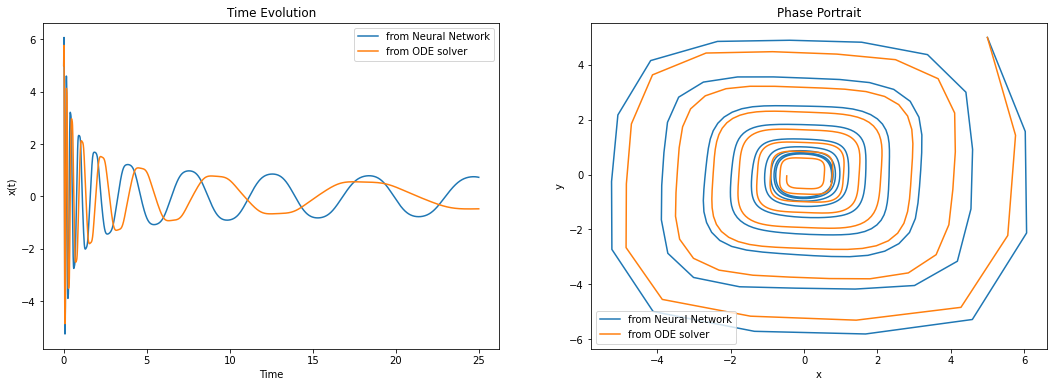

In [120]:
# plot the trajectories and the phase portraits

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system_NN[:,0], label='from Neural Network')
axs[0].plot(t, system[:,0], label='from ODE solver')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t)')
axs[0].legend()
axs[0].set_title('Time Evolution')
axs[1].plot(system_NN[:,0], system_NN[:,1], label='from Neural Network')
axs[1].plot(system[:,0], system[:,1], label='from ODE solver')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].set_title('Phase Portrait')
plt.show()

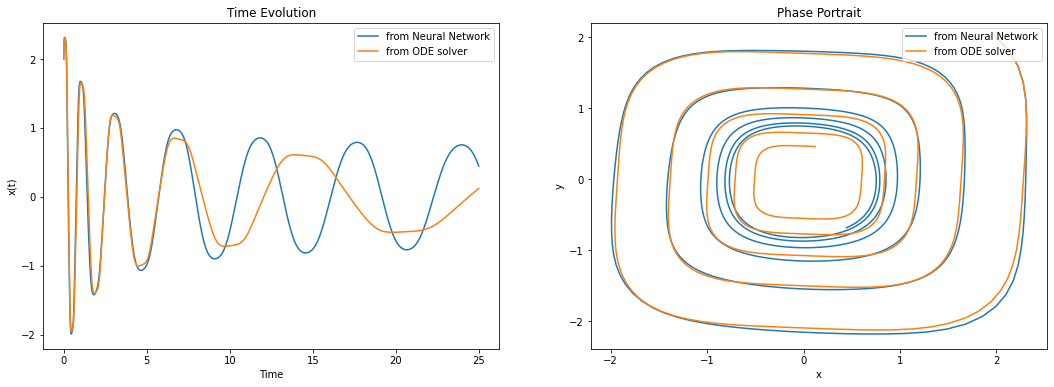

In [121]:
# Checking from another set of initial conditions: (x,y) = (10,10)

x0y0 = [2,2]

system = odeint(f, x0y0, t)
system_NN = odeint(f_NN, x0y0, t)

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system_NN[:,0], label='from Neural Network')
axs[0].plot(t, system[:,0], label='from ODE solver')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t)')
axs[0].legend()
axs[0].set_title('Time Evolution')
axs[1].plot(system_NN[:,0], system_NN[:,1], label='from Neural Network')
axs[1].plot(system[:,0], system[:,1], label='from ODE solver')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].set_title('Phase Portrait')
plt.show()

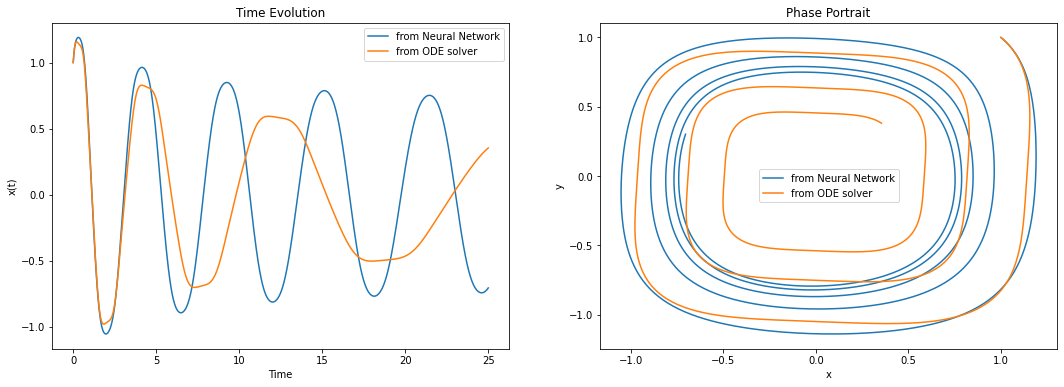

In [122]:
# Checking from another set of initial conditions: (x,y) = (1,1)

x0y0 = [1,1]

system = odeint(f, x0y0, t)
system_NN = odeint(f_NN, x0y0, t)

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system_NN[:,0], label='from Neural Network')
axs[0].plot(t, system[:,0], label='from ODE solver')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t)')
axs[0].legend()
axs[0].set_title('Time Evolution')
axs[1].plot(system_NN[:,0], system_NN[:,1], label='from Neural Network')
axs[1].plot(system[:,0], system[:,1], label='from ODE solver')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].set_title('Phase Portrait')
plt.show()